## **TRABAJO MINERÍA DE DATOS PYTHON**
##UNIVERSIDAD SANTO TOMÁS
##Facultad de estadística
##Estudiantes:

* Tatiana Chavez Perez
* Laura Jimena Tinjacá Lara

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt


# BASE DE DATOS
La base de datos escogida para el siguiente trabajo es proveniente de Data Icfes, la plataforma oficial del ICFES cuya información es libre de uso. <BR>
Se observan los resultados del Pre-ICFES para los colegios en Colombia para el año 2018, reportando las siguientes variables:
* Puesto: El puesto que obtuvo cada colegio medido a través del promedio general obtenido.
* Colegio: El nombre del colegio.
* Departamento: Departamento de Colombia al cual pertenece el colegio.
* Municipio: Municipio del departamento al que pertenece el colegio.
* Oficial: Si el colegio es oficial o público, o por el contrario, no es oficial o privado.
* Periodo: Es el periodo académico en el que presentó las pruebas.
* Jornada: Jornada en la que se llevan a cabo las actividades escolares, puede ser en la mañana, tarde, noche, solo fines de semana (sábados y domingos) o jornada completa.
*  Calendario: El calendario académico al cual pertenece el colegio, puede ser calendario A, calendario B o calendario F (no trabaja en horarios definidos por lo que los alumnos se pueden graduar en cualquier momento del año siempre y cuando cumplan todos los requisitos).
* Número de evaluados: Cantidad de estudiantes que presentaron la prueba por cada colegio.
* Promedio general: Es el promedio general obtenido por cada colegio teniendo en cuenta todas las categorías evaluadas.
* Variables: Se observan 8 diferentes variables que miden diferentes campos educativos: Matemáticas, química, física, biología, filosofía, inglés, lenguaje y sociales. Para cada uno se tiene el promedio que se obtuvo para cada colegio. 
* Variables DE: Las variables DE son los índices para cada campo educativo mencionado anteriormente. Este índice no se tendrá en cuenta en el análisis ya que sólo funciona como una referencia para la obtención del promedio para cada variable.

In [6]:
datos=pd.read_excel('/content/drive/MyDrive/Base icfes.xlsx')
datos.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Puesto,Colegio,Municipio,Departamento,Oficial,Periodo,Jornada,Calendario,Evaluados,Promedio General,...,Lenguaje,Sociales,DE-Matemáticas,DE-Química,DE-Física,DE-Biología,DE-Filosofía,DE-Inglés,DE-Lenguaje,DE-Sociales
0,1.0,COLEGIO LA QUINTA DEL PUENTE,Floridablanca,Santander,NO,1.0,C,B,31.0,70.08,...,63.32,64.68,17.35,10.56,10.36,6.53,6.13,7.37,5.82,8.29
1,2.0,COLEGIO BILINGUE DIANA OESE,Cali,Valle,NO,1.0,C,B,11.0,68.98,...,58.96,58.91,16.34,8.70,16.14,12.54,6.93,5.07,5.77,7.04
2,3.0,GIMNASIO COLOMBO BRITANICO,Bogotá D.C.,Bogotá,NO,2.0,C,A,73.0,67.95,...,74.29,66.71,11.25,9.83,9.57,7.12,11.15,7.81,9.17,9.34
3,4.0,COLEGIO SANTA FRANCISCA ROMANA,Bogotá D.C.,Bogotá,NO,1.0,C,B,57.0,66.87,...,61.91,62.22,13.88,8.82,7.39,5.58,5.60,5.89,6.26,4.94
4,5.0,COLEGIO SAN JORGE DE INGLATERRA,Bogotá D.C.,Bogotá,NO,1.0,C,B,58.0,66.66,...,63.47,64.57,12.95,6.90,8.34,7.17,6.08,7.49,6.59,5.43


In [7]:
print('BASE ICFES')
print('Número de observaciones :', datos.shape[0])
print('Número de variables: ', datos.shape[1])

BASE ICFES
Número de observaciones : 12273
Número de variables:  26


La base de datos contiene información de 12.273 colegios a los que se les midió un total de 26 variables. <BR>

# PREPROCESAMIENTO DE DATOS

### DEFINICIÓN DEL TIPO DE CADA VARIABLE

In [8]:
datos.dtypes

Puesto              float64
Colegio              object
Municipio            object
Departamento         object
Oficial              object
Periodo             float64
Jornada              object
Calendario           object
Evaluados           float64
Promedio General    float64
Matemáticas         float64
Química             float64
Física              float64
Biología            float64
Filosofía           float64
Inglés              float64
Lenguaje            float64
Sociales            float64
DE-Matemáticas      float64
DE-Química          float64
DE-Física           float64
DE-Biología         float64
DE-Filosofía        float64
DE-Inglés           float64
DE-Lenguaje         float64
DE-Sociales         float64
dtype: object

Se transforma la variable Periodo en una variable cualitativa

In [9]:
datos['Periodo']=datos['Periodo'].astype('str')

In [10]:
datos.dtypes

Puesto              float64
Colegio              object
Municipio            object
Departamento         object
Oficial              object
Periodo              object
Jornada              object
Calendario           object
Evaluados           float64
Promedio General    float64
Matemáticas         float64
Química             float64
Física              float64
Biología            float64
Filosofía           float64
Inglés              float64
Lenguaje            float64
Sociales            float64
DE-Matemáticas      float64
DE-Química          float64
DE-Física           float64
DE-Biología         float64
DE-Filosofía        float64
DE-Inglés           float64
DE-Lenguaje         float64
DE-Sociales         float64
dtype: object

### DATOS FALTANTES

In [11]:
datos_faltantes = pd.DataFrame()
datos_faltantes['Variable'] = list(datos.columns)
datos_faltantes['Número de datos faltantes'] = list(datos.isnull().sum())
datos_faltantes['Porcentaje de datos faltantes'] =  list((datos.isnull().sum() / datos.shape[0])*100) 
datos_faltantes

,Variable,Número de datos faltantes,Porcentaje de datos faltantes
0,Puesto,0,0.000000
1,Colegio,0,0.000000
2,Municipio,0,0.000000
3,Departamento,0,0.000000
4,Oficial,0,0.000000
5,Periodo,0,0.000000
6,Jornada,0,0.000000
7,Calendario,0,0.000000
8,Evaluados,0,0.000000
9,Promedio General,0,0.000000


In [12]:
datos[datos["Inglés"].isnull() == True]

,Puesto,Colegio,Municipio,Departamento,Oficial,Periodo,Jornada,Calendario,Evaluados,Promedio General,...,Lenguaje,Sociales,DE-Matemáticas,DE-Química,DE-Física,DE-Biología,DE-Filosofía,DE-Inglés,DE-Lenguaje,DE-Sociales
12205,12206.0,CENTRO DE EDUCACION Y REHABILITACION DE LA AUD...,Barranquilla,Atlántico,NO,2.0,Mñ,A,21.0,34.27,...,35.57,40.29,6.93,11.04,8.55,11.67,12.6,NaN,11.79,8.02


In [13]:
datos[datos["DE-Inglés"].isnull() == True]

,Puesto,Colegio,Municipio,Departamento,Oficial,Periodo,Jornada,Calendario,Evaluados,Promedio General,...,Lenguaje,Sociales,DE-Matemáticas,DE-Química,DE-Física,DE-Biología,DE-Filosofía,DE-Inglés,DE-Lenguaje,DE-Sociales
12205,12206.0,CENTRO DE EDUCACION Y REHABILITACION DE LA AUD...,Barranquilla,Atlántico,NO,2.0,Mñ,A,21.0,34.27,...,35.57,40.29,6.93,11.04,8.55,11.67,12.6,NaN,11.79,8.02


In [14]:
datos.isnull().sum()

Puesto              0
Colegio             0
Municipio           0
Departamento        0
Oficial             0
Periodo             0
Jornada             0
Calendario          0
Evaluados           0
Promedio General    0
Matemáticas         0
Química             0
Física              0
Biología            0
Filosofía           0
Inglés              1
Lenguaje            0
Sociales            0
DE-Matemáticas      0
DE-Química          0
DE-Física           0
DE-Biología         0
DE-Filosofía        0
DE-Inglés           1
DE-Lenguaje         0
DE-Sociales         0
dtype: int64

Se puede observar que hay un dato faltante para el promedio de INGLÉS y un dato faltante para el índice DE-Inglés. Sin embargo, ya que ambas variables está asociada es decir que el índice DE-Inglés se obtiene medianto el promedio de INGLÉS, es decir que el dato faltante se encuentra para el mismo individuo. <BR> 
Para las demás variables no se obtienen datos faltantes por lo cuál se opta por eliminar la observación 12205 con el dato faltante encontrado.



In [15]:
datos=datos.drop(datos.index[[12205]])


In [16]:
print('Número de individuos :', datos.shape[0])
print('Número de variables: ', datos.shape[1])

Número de individuos : 12272
Número de variables:  26


In [17]:
datos[datos["Inglés"].isnull() == True]

,Puesto,Colegio,Municipio,Departamento,Oficial,Periodo,Jornada,Calendario,Evaluados,Promedio General,...,Lenguaje,Sociales,DE-Matemáticas,DE-Química,DE-Física,DE-Biología,DE-Filosofía,DE-Inglés,DE-Lenguaje,DE-Sociales


In [18]:
datos[datos["DE-Inglés"].isnull() == True]

,Puesto,Colegio,Municipio,Departamento,Oficial,Periodo,Jornada,Calendario,Evaluados,Promedio General,...,Lenguaje,Sociales,DE-Matemáticas,DE-Química,DE-Física,DE-Biología,DE-Filosofía,DE-Inglés,DE-Lenguaje,DE-Sociales


### DATOS DUPLICADOS

In [19]:
datos.duplicated().sum()

0

No se encontraron datos duplicados.

 ### CONSISTENCIA DE LOS DATOS

#### Variables cuantitativas

In [20]:
datos.describe()

,Puesto,Evaluados,Promedio General,Matemáticas,Química,Física,Biología,Filosofía,Inglés,Lenguaje,Sociales,DE-Matemáticas,DE-Química,DE-Física,DE-Biología,DE-Filosofía,DE-Inglés,DE-Lenguaje,DE-Sociales
count,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000
mean,6136.505460,46.583523,43.452143,44.792289,44.250803,43.701918,44.491418,39.028722,42.706333,45.057474,43.582579,9.798851,6.892526,8.554339,8.641405,10.419605,6.637999,9.227383,8.509174
std,3542.774992,45.365483,4.842894,6.949680,3.950031,4.288664,4.781148,5.756981,6.034090,5.854294,5.164330,2.085530,1.634811,1.880216,2.042865,2.348868,2.109737,2.119176,1.794642
min,1.000000,1.000000,23.310000,13.500000,14.000000,13.000000,16.500000,8.000000,0.000000,15.000000,18.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3068.750000,17.000000,40.220000,40.090000,41.750000,41.000000,41.330000,35.160000,39.880000,41.137500,40.130000,8.780000,6.050000,7.600000,7.610000,9.227500,5.470000,8.210000,7.600000
50%,6136.500000,33.000000,42.820000,44.315000,44.000000,43.300000,44.110000,38.810000,41.240000,44.950000,42.880000,9.840000,6.830000,8.560000,8.660000,10.560000,6.300000,9.350000,8.570000
75%,9204.250000,62.000000,45.700000,48.520000,46.210000,45.782500,47.090000,42.630000,43.250000,48.510000,46.130000,10.880000,7.640000,9.500000,9.660000,11.730000,7.420000,10.380000,9.500000
max,12273.000000,1037.000000,70.080000,96.590000,74.000000,73.460000,69.500000,65.000000,87.970000,74.290000,74.410000,31.570000,23.040000,27.580000,38.890000,28.280000,29.010000,28.990000,28.020000


De acuerdo a la consistencia de las variables cuantitativas que tiene la base de datos del ICFES se tiene que ninguna de estas variables presenta alguna inconsistencia ya que el promedio de las materias se encuentran en un intervalo de 0 a 100 y teniendo en cuenta que los índices de cada materia se obtiene mediante el promedio de la materia correspondiente y dado que estas son consistentes, los índices de igual manera son consistentes.

#### Variables cualitativas

In [21]:
cole = pd.DataFrame(datos['Colegio'].value_counts())
cole

,Colegio
INSTITUTO CORFERRINI,37
INSTITUTO TECNICO PARA EL DESARROLLO RURAL IDEAR,29
INSTITUCION EDUCATIVA SAN JOSE,22
INSTITUTO AGRICOLA,22
INSTITUTO REGIONAL DE EDUCACION RURAL - IRER,20
...,...
INSTITUCION EDUCATIVA ELEAZAR LIBREROS,1
INSTITUCION EDUCATIVA DISTRITAL CLEMENCIA HOLGUIN DE URDANETA,1
COLEGIO MARIA DEL SOCORRO,1
INSTITUCION EDUCATIVA ROMAN MARIA VALENCIA,1


In [22]:
cole.iloc[0:60]

,Colegio
INSTITUTO CORFERRINI,37
INSTITUTO TECNICO PARA EL DESARROLLO RURAL IDEAR,29
INSTITUCION EDUCATIVA SAN JOSE,22
INSTITUTO AGRICOLA,22
INSTITUTO REGIONAL DE EDUCACION RURAL - IRER,20
INSTITUCION EDUCATIVA SIMON BOLIVAR,19
COLEGIO DE LA PRESENTACION,19
CIBERCOLEGIO UCN,17
INSTITUCION EDUCATIVA MARIA AUXILIADORA,17
INSTITUCION EDUCATIVA NUESTRA SEÑORA DEL CARMEN,16


In [23]:
cole.iloc[61:120]

,Colegio
COLEGIO COLOMBO BRITANICO,8
INSTITUTO ARQUIDIOCESANO URBANO Y RURAL IAUR,8
INSTITUCION EDUCATIVA MARIA INMACULADA,8
COLEGIO TRIANGULO,8
COLEGIO COLOMBIANO DE BACHILLERATO,8
COLEGIO NUESTRA SEÑORA DEL CARMEN,8
INSTITUTO DE EDUCACION COMFENALCO CONSUELO MONTOYA GIL,8
COLEGIO LA SALLE,7
COLEGIO DE LA SAGRADA FAMILIA,7
COLEGIO BOLIVARIANO,7


In [24]:
cole.iloc[121:180]

,Colegio
COLEGIO MARIA INMACULADA,5
INSTITUTO TECNICO AGRICOLA,5
INSTITUCION EDUCATIVA SAN PEDRO,5
COLEGIO DEL SAGRADO CORAZON DE JESUS,5
ATENEO AUTONOMO DE COLOMBIA,5
COLEGIO JORGE ELIECER GAITAN,5
COLEGIO DEPARTAMENTAL DE BACHILLERATO,5
INSTITUCION EDUCATIVA SANTA TERESA,5
INSTITUCIÓN EDUCATIVA EL PORTICO,5
INSTITUTO CALIMA,5


In [25]:
cole.iloc[181:240]

,Colegio
COLEGIO MUNICIPAL GUILLERMO NIÑO MEDINA,4
LICEO DEL CARIBE,4
INSTITUCION EDUCATIVA NUESTRA SEÑORA DE FATIMA,4
LICEO JOSE FELIX JIMENEZ,4
INSTITUCION EDUCATIVA DIVINO NIÑO,4
NUEVO INSTITUTO DE APRENDIZAJE SURCOLOMBIANO,4
COLEGIO PABLO VI,4
COLEGIO EL CARMELO,4
INSTITUCION EDUCATIVA CARLOTA SANCHEZ,4
INSTITUCION EDUCATIVA FRANCISCO MIRANDA,4


In [26]:
cole.iloc[8760:8820]

,Colegio
INSTITUCION EDUCATIVA AGROPECUARIA VILLALOBOS,1
COLEGIO FELIPE HENAO JARAMILLO,1
COLEGIO DEPARTAMENTAL TECNICO AGROPECUARIO MARTIN ROMERO,1
INSTITUTO EDUCATIVO EL LLANO,1
COLEGIO COMPARTIR,1
CENTRO EDUCATIVO DISTRITAL HERNANDO DURAN DUSSAN,1
CED GIMNASIO SABIO CALDAS,1
UNIDAD EDUCATIVA CASTILLA LA NUEVA,1
COLEGIO EMILIO SOTOMAYOR,1
COLEGIO DEPARTAMENTAL NACIONALIZADO ALFONSO LOPEZ PUMAREJO,1


In [27]:
cole.iloc[8721:8886]

,Colegio
LICEO CRISTIANO MANANTIAL DE VIDA,1
INSTITUCION EDUCATIVA HERNAN VILLA,1
COLEGIO INTEGRADO CAJETE,1
ESCUELA NORMAL SUPERIOR SAGRADA FAMILIA,1
BACHILLERATO SEMIPRESENCIAL Y A DISTANCIA,1
...,...
INSTITUCION EDUCATIVA ELEAZAR LIBREROS,1
INSTITUCION EDUCATIVA DISTRITAL CLEMENCIA HOLGUIN DE URDANETA,1
COLEGIO MARIA DEL SOCORRO,1
INSTITUCION EDUCATIVA ROMAN MARIA VALENCIA,1


In [28]:
dep = pd.DataFrame(datos['Departamento'].value_counts())
dep

,Departamento
Bogotá,1660
Antioquia,1446
Valle,1149
Cundinamarca,916
Santander,648
Atlántico,624
Bolívar,533
Boyacá,501
Tolima,430
Cauca,422


In [29]:
muni = pd.DataFrame(datos['Municipio'].value_counts())
muni

,Municipio
Bogotá D.C.,1660
Cali,555
Barranquilla,385
Medellin,356
Cartagena,249
...,...
Barranca De Upia,1
Tibirita,1
Sora,1
Puerto Santander,1


In [30]:
muni.iloc[0:60]

,Municipio
Bogotá D.C.,1660
Cali,555
Barranquilla,385
Medellin,356
Cartagena,249
Bucaramanga,150
Villavicencio,148
Pereira,135
Cucuta,127
Santa Marta,125


In [31]:
muni.iloc[1010:1070]

,Municipio
La Jagua Del Pilar,1
Bituima,1
Sativasur,1
San Calixto,1
Coloso (Ricaurte),1
Pisva,1
Tenza,1
Oicata,1
Herran,1
California,1


In [32]:
datos['Oficial'].value_counts()

SI      7904
NO      4363
n.d.       5
Name: Oficial, dtype: int64

In [33]:
datos[datos['Oficial']=='n.d.']

,Puesto,Colegio,Municipio,Departamento,Oficial,Periodo,Jornada,Calendario,Evaluados,Promedio General,...,Lenguaje,Sociales,DE-Matemáticas,DE-Química,DE-Física,DE-Biología,DE-Filosofía,DE-Inglés,DE-Lenguaje,DE-Sociales
7717,7718.0,INSTITUTO TECNICO PARA EL DESARROLLO RURAL IDEAR,Zapatoca,Santander,n.d.,2.0,C,A,20.0,41.53,...,44.65,43.45,6.53,7.68,8.05,9.16,9.34,5.48,8.03,6.06
8135,8136.0,INSTITUCION EDUCATIVA RURAL VANGUARDIA,Villavicencio,Meta,n.d.,2.0,N,F,22.0,41.14,...,45.68,44.59,11.43,6.70,7.72,5.93,10.94,7.24,10.31,8.68
9597,9598.0,INSTITUCION EDUCATIVA RURAL MARIA GORETTI,Manizales,Caldas,n.d.,2.0,S-D,F,49.0,39.83,...,41.37,40.33,9.45,6.48,9.28,7.13,9.81,5.17,8.18,8.81
10826,10827.0,INSTITUTO TECNICO PARA EL DESARROLLO RURAL IDEAR,Cabrera,Santander,n.d.,2.0,C,A,7.0,38.45,...,32.71,37.71,6.68,6.26,4.30,10.25,5.97,7.87,9.43,5.88
11865,11866.0,INSTITUTO TECNICO PARA EL DESARROLLO RURAL IDEAR,Barichara,Santander,n.d.,2.0,C,A,8.0,36.38,...,34.25,39.00,7.06,5.63,8.49,8.72,10.73,7.33,10.08,8.90


Se deciden eliminar aquellos registros donde no se clasificó al colegio como si fuera o no un colegio oficial.

In [34]:
datos = datos.drop(datos.index[[7717,8135,9597,10826,11865]])


In [35]:
datos[datos['Oficial']=='n.d.']

,Puesto,Colegio,Municipio,Departamento,Oficial,Periodo,Jornada,Calendario,Evaluados,Promedio General,...,Lenguaje,Sociales,DE-Matemáticas,DE-Química,DE-Física,DE-Biología,DE-Filosofía,DE-Inglés,DE-Lenguaje,DE-Sociales


In [36]:
print('Así va la base...')
print('Filas :', datos.shape[0])
print('Columnas :', datos.shape[1])

Así va la base...
Filas : 12267
Columnas : 26


In [37]:
pd.DataFrame(datos['Periodo'].value_counts())

,Periodo
2.0,11248
1.0,1019


In [38]:
pd.DataFrame(datos['Calendario'].value_counts())

,Calendario
A,9809
F,2112
B,346


In [39]:
pd.DataFrame(datos['Jornada'].value_counts())

,Jornada
Mñ,4644
C,3749
T,1585
N,1440
S-D,849


**No se encontraron inconsistencia para las variables cualitativas, exceptuando por la variable Oficial que se refiere a que si el colegio es oficial o no, dado que en 5 registros no se identifico a que categoría pertenece el colegio, se optan por eliminar estos registros.**

# SELECCIÓN DE VARIABLES
Dado el preprocesamiento de los datos se queda con una información total de  12262 colegios y 26 variables.

### SELECCIÓN INICIAL

In [40]:
columns = ['Puesto','Departamento','Oficial','Periodo','Jornada','Calendario','Evaluados','Promedio General','Matemáticas','Química','Física','Biología',
           'Filosofía','Inglés','Lenguaje','Sociales']
datos2 = datos.copy()
datos2 = datos2[columns]
datos2

,Puesto,Departamento,Oficial,Periodo,Jornada,Calendario,Evaluados,Promedio General,Matemáticas,Química,Física,Biología,Filosofía,Inglés,Lenguaje,Sociales
0,1.0,Santander,NO,1.0,C,B,31.0,70.08,90.67,67.48,73.46,63.90,52.03,85.06,63.32,64.68
1,2.0,Valle,NO,1.0,C,B,11.0,68.98,96.59,62.47,72.30,65.24,52.91,84.45,58.96,58.91
2,3.0,Bogotá,NO,2.0,C,A,73.0,67.95,69.97,64.85,65.51,63.22,62.15,76.89,74.29,66.71
3,4.0,Bogotá,NO,1.0,C,B,57.0,66.87,84.00,65.50,59.77,61.10,52.79,87.68,61.91,62.22
4,5.0,Bogotá,NO,1.0,C,B,58.0,66.66,78.28,63.52,61.18,63.10,53.23,85.89,63.47,64.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12268,12269.0,Bolívar,SI,2.0,S-D,F,1.0,30.38,35.00,47.00,13.00,20.00,28.00,39.00,33.00,28.00
12269,12270.0,Bogotá,NO,2.0,C,A,30.0,30.02,32.63,39.10,34.87,37.30,28.77,0.00,32.57,34.93
12270,12271.0,Bogotá,NO,2.0,Mñ,A,8.0,29.57,31.13,34.63,38.75,36.63,26.50,0.00,33.63,35.25
12271,12272.0,Valle,NO,2.0,Mñ,A,2.0,29.50,31.00,14.00,19.50,36.50,28.50,40.50,35.00,31.00


No se tendrán en cuenta las siguientes variables: 
* Colegio: Puesto que se considera una etiqueta del individuo, lo cual no es de nuestro interés.
* Municipio: Hay demasiadas categorías para esta variable, además hay municipios que sólo tienen un colegio. No se considera relevante para el estudio y mejor se usará una variable más genérica como lo es el departamento.
* DE: Las variables DE no se tendrán en cuenta debido a que, como se mencionó al inicio, representan un índice de los resultados obtenidos por materia, información que no resulta relevante ya que se tienen los resultados por materia en otras variables.

In [41]:
print('Número de individuos :', datos2.shape[0])
print('Número de variables :', datos2.shape[1])

Número de individuos : 12267
Número de variables : 16


### ANÁLISIS VARIABLES CUALITATIVAS

#### BOXPLOT
Se realizan los respectivos boxplot entre las posibles variables explicativas cualitativas y la variable respuesta Puesto. Se busca detectar gráficamente diferencias en medias y comportamientos diferentes en las categorías de las variables para que tenga sentido ajustar un modelo con esas variables.

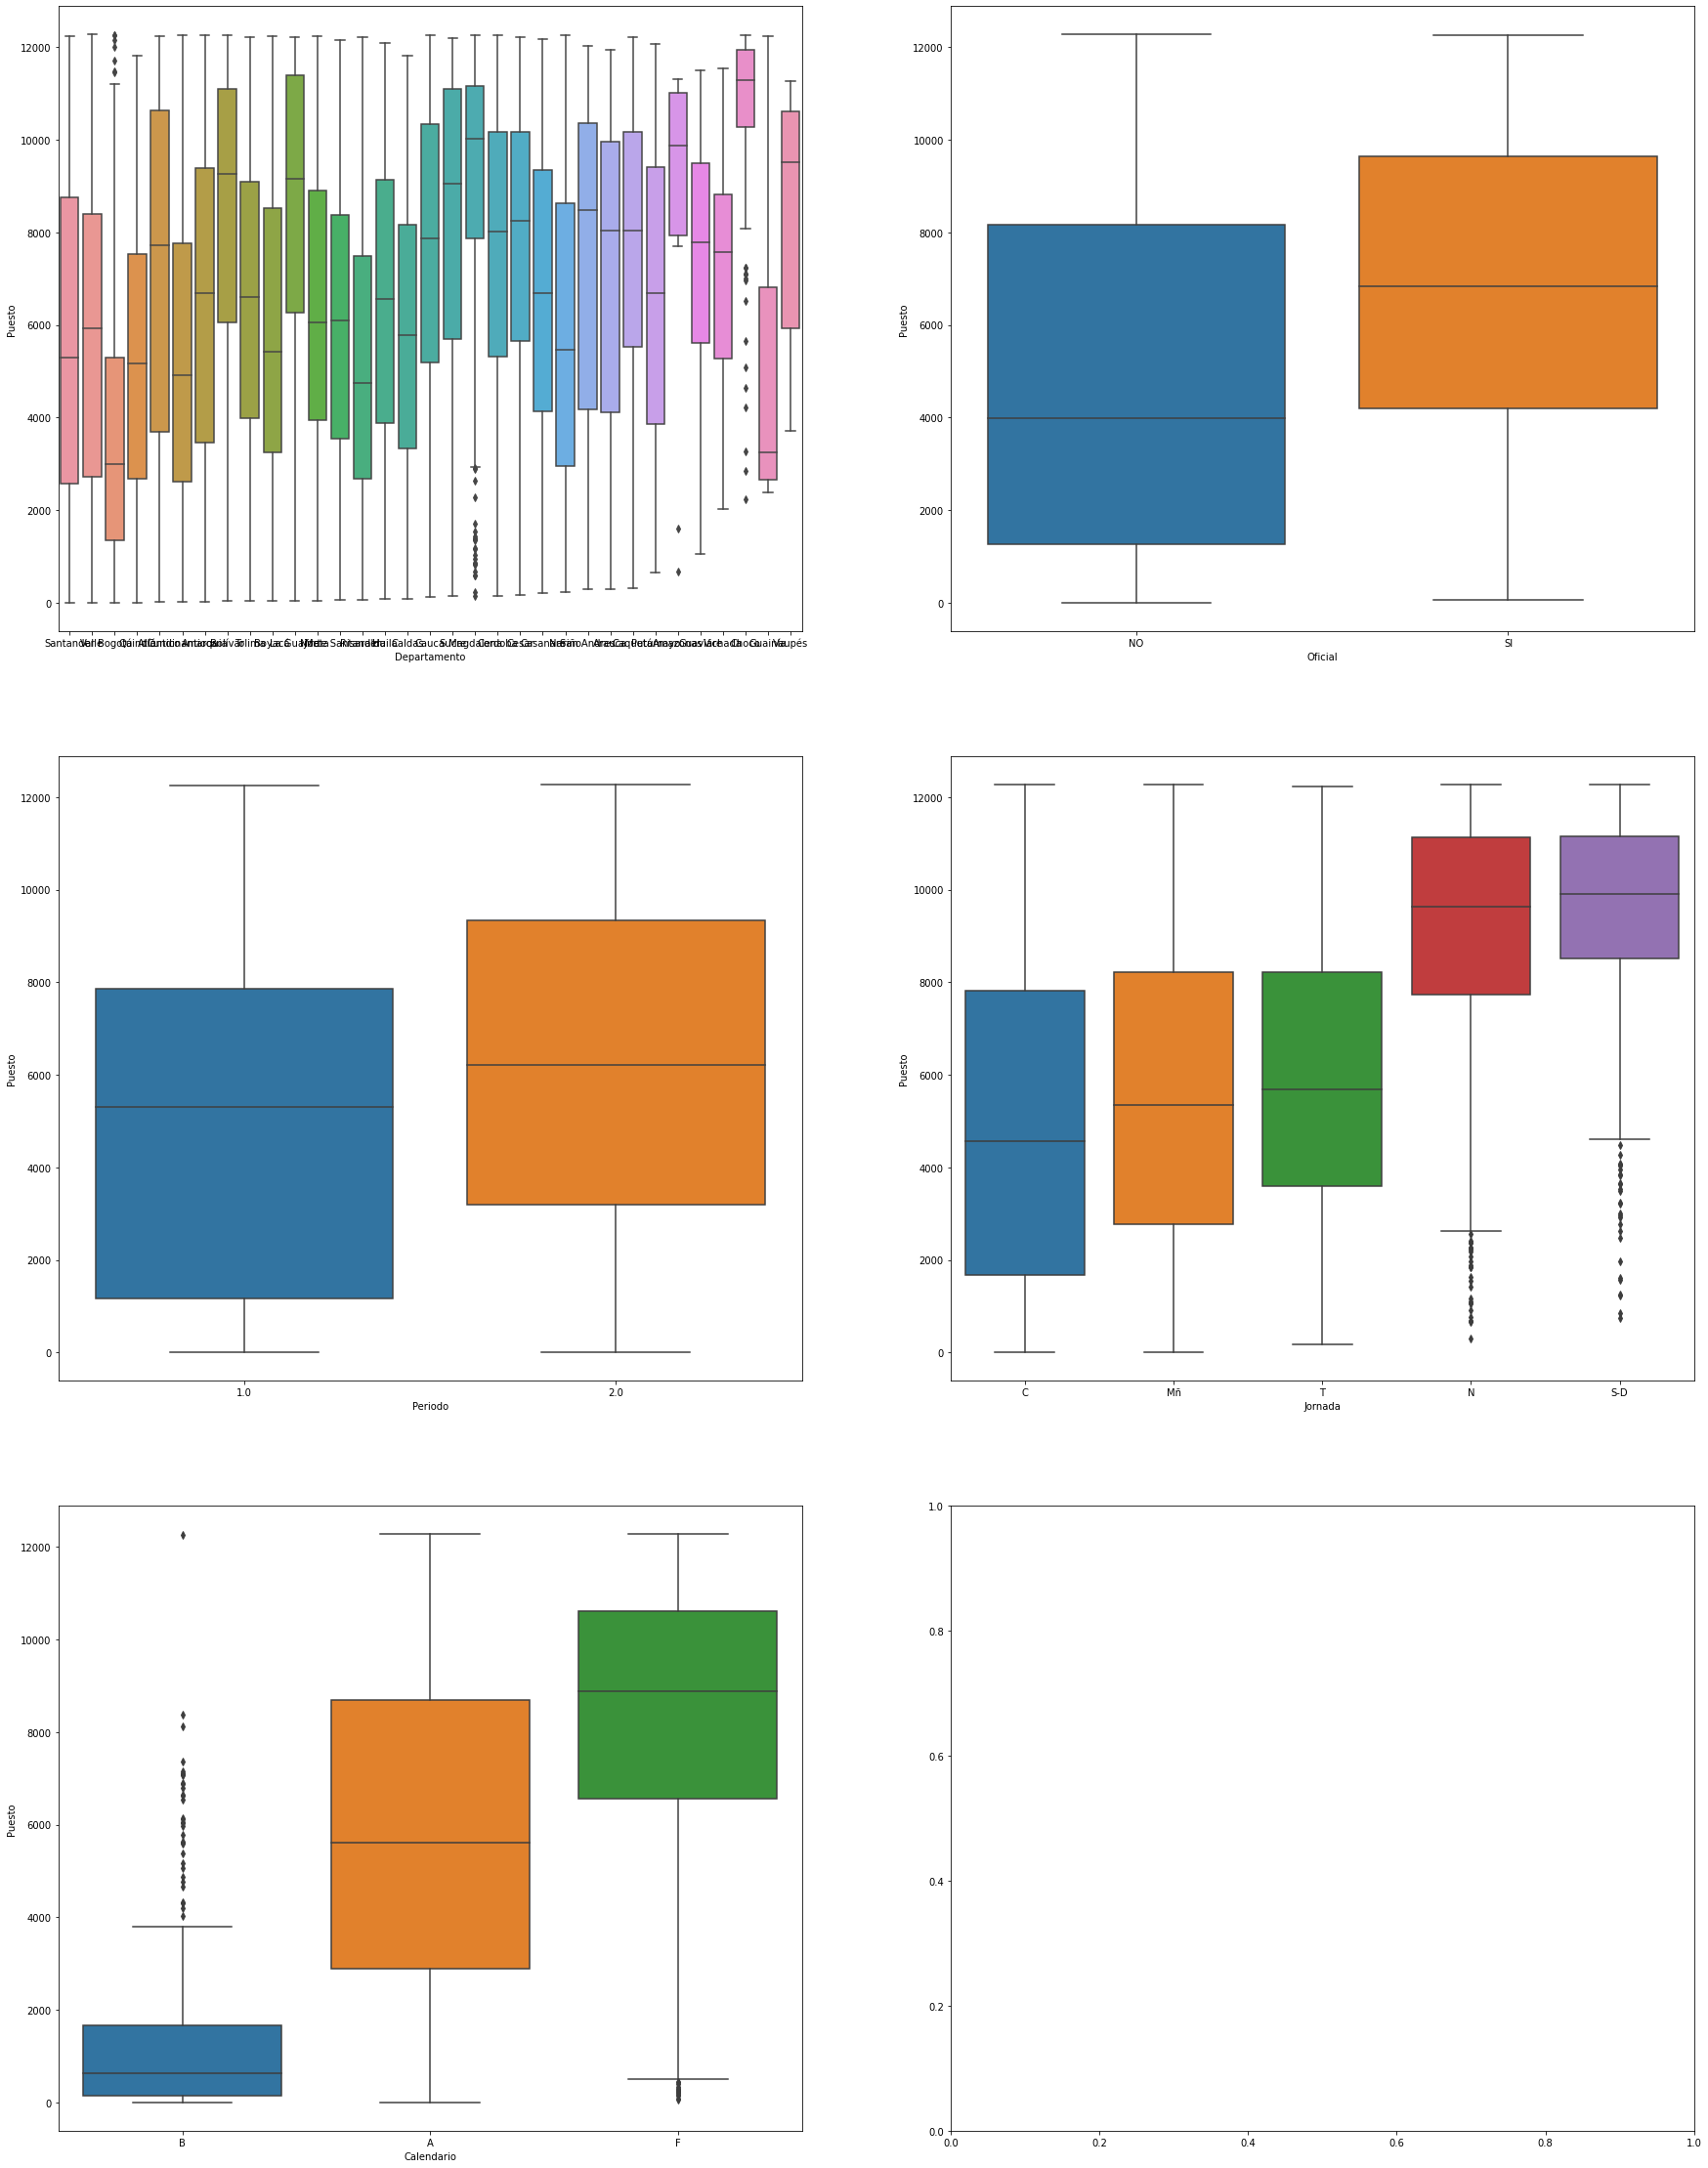

In [42]:
import seaborn
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(30, 40))
seaborn.boxplot(ax=axes[0, 0], data=datos2, x='Departamento',y='Puesto')
seaborn.boxplot(ax=axes[0, 1], data=datos2, x='Oficial',y='Puesto') 
seaborn.boxplot(ax=axes[1, 0], data=datos2, x='Periodo',y='Puesto')
seaborn.boxplot(ax=axes[1, 1], data=datos2, x='Jornada',y='Puesto') 
seaborn.boxplot(ax=axes[2, 0], data=datos2, x='Calendario',y='Puesto')


Gráficamente se observan diferencias en las medias de las categorías de todas las variables. Por tanto, las 5 variables cualitativas son candidatas para ser variables explicativas.

#### DIFERENCIA DE MEDIAS POR TRATAMIENTO CON PRUEBA t.test

##### DEPARTAMENTO

In [43]:
datos2.groupby('Departamento')['Puesto'].agg(['mean', 'std'])

,mean,std
Departamento,,
Amazonas,8784.937500,3224.068309
Antioquia,6424.684647,3442.327777
Arauca,7018.253521,3460.074379
Atlántico,7056.623397,3840.927425
Bogotá,3569.646386,2688.083131
Bolívar,8129.373358,3600.480253
Boyacá,5836.762475,3249.881711
Caldas,5751.362369,3022.782709
Caquetá,7521.691057,3158.496032


In [44]:
from scipy import stats
datos2['puesto'] = datos2['Puesto']
stats.f_oneway(datos2.puesto[datos2.Departamento == 'Amazonas'],datos2.puesto[datos2.Departamento == 'Antioquia'],
               datos2.puesto[datos2.Departamento == 'Arauca'],datos2.puesto[datos2.Departamento == 'Atlántico'],
               datos2.puesto[datos2.Departamento == 'Bogotá'],datos2.puesto[datos2.Departamento == 'Bolívar'],
               datos2.puesto[datos2.Departamento == 'Boyacá'],datos2.puesto[datos2.Departamento == 'Caldas'],
               datos2.puesto[datos2.Departamento == 'Caquetá'],datos2.puesto[datos2.Departamento == 'Casanare'],
               datos2.puesto[datos2.Departamento == 'Cauca'],datos2.puesto[datos2.Departamento == 'Cesar'],
               datos2.puesto[datos2.Departamento == 'Choco'],datos2.puesto[datos2.Departamento == 'Cordoba'],
               datos2.puesto[datos2.Departamento == 'Cundinamarca'],datos2.puesto[datos2.Departamento == 'Guainía'],
               datos2.puesto[datos2.Departamento == 'Guaviare'],datos2.puesto[datos2.Departamento == 'Huila'],
               datos2.puesto[datos2.Departamento == 'La Guajira'],datos2.puesto[datos2.Departamento == 'Magdalena'],
               datos2.puesto[datos2.Departamento == 'Meta'],datos2.puesto[datos2.Departamento == 'Nariño'],
               datos2.puesto[datos2.Departamento == 'Norte Santander'],datos2.puesto[datos2.Departamento == 'Putumayo'],
               datos2.puesto[datos2.Departamento == 'Quindio'],datos2.puesto[datos2.Departamento == 'Risaralda'],
               datos2.puesto[datos2.Departamento == 'San Andres'],datos2.puesto[datos2.Departamento == 'Santander'],
               datos2.puesto[datos2.Departamento == 'Sucre'],datos2.puesto[datos2.Departamento == 'Tolima'],
               datos2.puesto[datos2.Departamento == 'Valle'],datos2.puesto[datos2.Departamento == 'Vaupés'],
               datos2.puesto[datos2.Departamento == 'Vichada'])

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

In [45]:
stats.f_oneway(datos2.puesto[datos2.Departamento == 'Amazonas'],datos2.puesto[datos2.Departamento == 'Antioquia'],
               datos2.puesto[datos2.Departamento == 'Arauca'],datos2.puesto[datos2.Departamento == 'Atlántico'],
               datos2.puesto[datos2.Departamento == 'Bogotá'],datos2.puesto[datos2.Departamento == 'Bolívar'],
               datos2.puesto[datos2.Departamento == 'Boyacá'])

F_onewayResult(statistic=201.83861706695097, pvalue=2.2377384233907925e-230)

A la hora de realizar el test de medias, se observa que con todas las observaciones de departamento da un valor casi de 0, ahora bien, si se realiza el proceso teniendo en cuenta menos departamentos se concluye que en efecto el p-valor da muy pequeño (pvalue=2.2377384233907925e-230). Se concluye que existen diferencias significativas en las medias de los puestos teniendo en cuenta el promedio de cada departamento.

##### OFICIAL

In [46]:
datos2.groupby('Oficial')['Puesto'].agg(['mean', 'std'])

,mean,std
Oficial,,
NO,4822.728398,3782.667072
SI,6859.499747,3178.978997


In [47]:
stats.f_oneway(datos2.puesto[datos2.Oficial == 'SI'],datos2.puesto[datos2.Oficial == 'NO'])

F_onewayResult(statistic=1005.3078403883009, pvalue=4.01333744289845e-212)

Existen diferencias significativas en las medias de los colegios públicos y privados, teniendo en cuenta el puesto alcanzado.

##### PERIODO

In [48]:
datos2.groupby('Periodo')['Puesto'].agg(['mean', 'std'])

,mean,std
Periodo,,
1.0,4904.574092,3571.880679
2.0,6246.558410,3518.959219


In [49]:
stats.f_oneway(datos2.puesto[datos2.Periodo == '1.0'],datos2.puesto[datos2.Periodo == '2.0'])

F_onewayResult(statistic=135.54595211227374, pvalue=3.65721967541568e-31)

Existen diferencias significativas en las medias de los colegios medidos en el primer periodo del año y en el segundo periodo del año, teniendo en cuenta el puesto alcanzado.

##### JORNADA

In [50]:
datos2.groupby('Jornada')['Puesto'].agg(['mean', 'std'])

,mean,std
Jornada,,
C,4973.996532,3564.554590
Mñ,5599.499139,3314.262424
N,9123.783333,2507.012634
S-D,9497.144876,2160.287559
T,5934.472555,2909.579072


In [51]:
stats.f_oneway(datos2.puesto[datos2.Jornada == 'C'],datos2.puesto[datos2.Jornada == 'Mñ'],datos2.puesto[datos2.Jornada == 'N'],
               datos2.puesto[datos2.Jornada == 'S-D'],datos2.puesto[datos2.Jornada == 'T'])

F_onewayResult(statistic=708.7775439227685, pvalue=0.0)

Existen diferencias estadísticamente significativas en las medias obtenidas por jornadas, teniendo en cuenta el puesto del colegio.

##### CALENDARIO

In [52]:
datos2.groupby('Calendario')['Puesto'].agg(['mean', 'std'])

,mean,std
Calendario,,
A,5838.249669,3442.351612
B,1363.303468,1888.697865
F,8295.433712,2911.138583


In [53]:
stats.f_oneway(datos2.puesto[datos2.Calendario == 'A'],datos2.puesto[datos2.Calendario == 'B'],datos2.puesto[datos2.Calendario == 'F'])

F_onewayResult(statistic=842.6907546150662, pvalue=0.0)

Existen diferencias significativas en las medias obtenidas por el calendario, teniendo en cuenta el puesto.

### ANÁLISIS VARIABLES CUANTITATIVAS
Se buscan variables cuantitativas que tengan correlaciones altas con la variable Puesto.

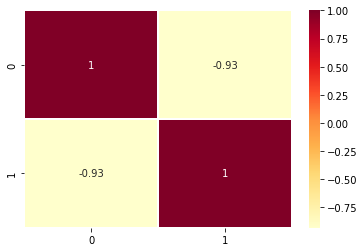

In [54]:
import seaborn as sns
tab1 = np.corrcoef(datos2['Puesto'],datos2['Promedio General'])
ax = sns.heatmap(tab1,
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlOrRd") 

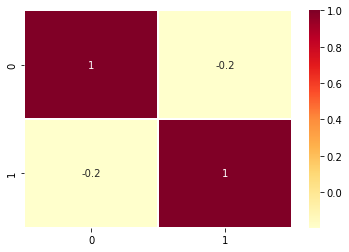

In [55]:
tab2 = np.corrcoef(datos2['Puesto'],datos2['Evaluados'])
ax = sns.heatmap(tab2,
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlOrRd") 

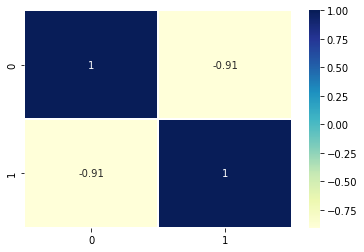

In [56]:
tab3 = np.corrcoef(datos2['Puesto'],datos2['Matemáticas'])
ax = sns.heatmap(tab3,
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlGnBu")

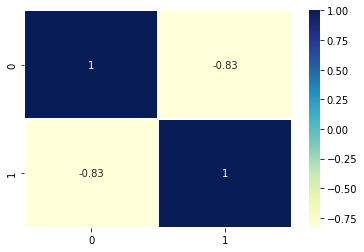

In [57]:
tab4 = np.corrcoef(datos2['Puesto'],datos2['Química'])
ax = sns.heatmap(tab4,
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlGnBu")

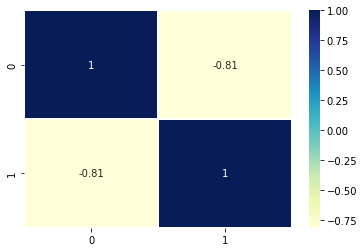

In [58]:
tab5 = np.corrcoef(datos2['Puesto'],datos2['Física'])
ax = sns.heatmap(tab5,
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlGnBu")

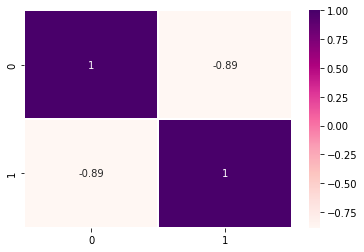

In [59]:
tab6 = np.corrcoef(datos2['Puesto'],datos2['Biología'])
ax = sns.heatmap(tab6,
                 annot=True, 
                 linewidths=.5, 
                 cmap="RdPu")

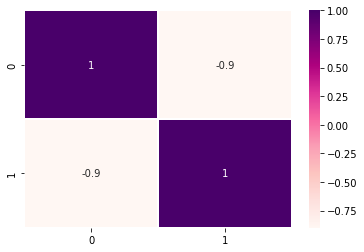

In [60]:
tab7 = np.corrcoef(datos2['Puesto'],datos2['Filosofía'])
ax = sns.heatmap(tab7,
                 annot=True, 
                 linewidths=.5, 
                 cmap="RdPu")

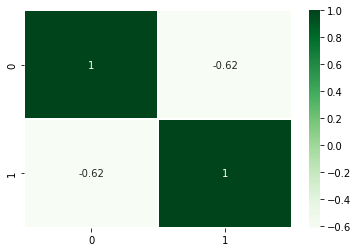

In [61]:
tab8 = np.corrcoef(datos2['Puesto'],datos2['Inglés'])
ax = sns.heatmap(tab8,
                 annot=True, 
                 linewidths=.5, 
                 cmap="Greens")

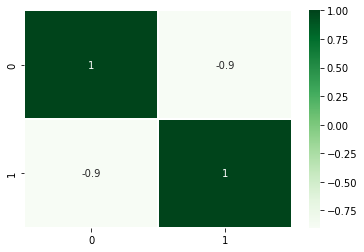

In [62]:
tab9 = np.corrcoef(datos2['Puesto'],datos2['Lenguaje'])
ax = sns.heatmap(tab9,
                 annot=True, 
                 linewidths=.5, 
                 cmap="Greens")

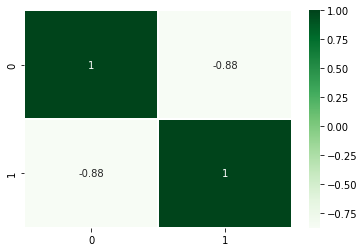

In [63]:
tab10 = np.corrcoef(datos2['Puesto'],datos2['Sociales'])
ax = sns.heatmap(tab10,
                 annot=True, 
                 linewidths=.5, 
                 cmap="Greens")

**RESUMEN CORRELACIONES**

In [64]:
cor_fin = pd.DataFrame({'Variable':['Promedio General','Evaluados','Matemáticas','Química','Física','Biología','Filosofía','Inglés','Lenguaje','Sociales']})
cor_fin['COEFICIENTE DE CORRELACIÓN']=(-0.93,-0.2,-0.91,-0.83,-0.81,-0.89,-0.9,-0.62,-0.9,-0.88)
cor_fin

,Variable,COEFICIENTE DE CORRELACIÓN
0,Promedio General,-0.93
1,Evaluados,-0.20
2,Matemáticas,-0.91
3,Química,-0.83
4,Física,-0.81
5,Biología,-0.89
6,Filosofía,-0.90
7,Inglés,-0.62
8,Lenguaje,-0.90
9,Sociales,-0.88


Se observa que todas las variables tienen correlaciones altas con el Puesto, excepto la variable que mide el número de evaluados por colegio.

### DECISIONES PRELIMINARES

  **VARIABLES CUANTITATIVAS ELEGIDAS**
* Promedio General (se obtuvo una correlación de -0.93 con el Puesto).
* Matemáticas (se obtuvo una correlación de -0.91 con el Puesto).
* Química (se obtuvo una correlación de -0.83 con el Puesto).
* Física (se obtuvo una correlación de -0.81 con el Puesto).
* Biología (se obtuvo una correlación de -0.89 con el Puesto).
* Filosofía (se obtuvo una correlación de -0.9 con el Puesto).
* Inglés (se obtuvo una correlación de -0.62 con el Puesto).
* Lenguaje (se obtuvo una correlación de -0.9 con el Puesto).
* Sociales (se obtuvo una correlación de -0.88 con el Puesto).

  **VARIABLES CUALITATIVAS ELEGIDAS**
* Región (Se agrupará por regiones del país para evitar un modelo muy saturado, ya que departamento tiene 33 categorías).
* Oficial.
* Periodo.
* Jornada.
* Calendario. <BR>
Esta es una idea inicial de las variables con las que se podría empezar el modelo, más adelante se hará la depuración correspondiente y se presentará el modelo final.

### AGRUPACIÓN EN REGIONES

In [65]:
datos2['Región'] =datos2['Departamento']

In [66]:
datos2.loc[datos2.Departamento == 'Antioquia','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Boyacá','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Caldas','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Cundinamarca','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Huila','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Norte Santander','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Quindío','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Risaralda','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Santander','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Tolima','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Bogotá','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Amazonas','Región'] = 'Amazónica'
datos2.loc[datos2.Departamento == 'Caquetá','Región'] = 'Amazónica'
datos2.loc[datos2.Departamento == 'Guainía','Región'] = 'Amazónica'
datos2.loc[datos2.Departamento == 'Guaviare','Región'] = 'Amazónica'
datos2.loc[datos2.Departamento == 'Putumayo','Región'] = 'Amazónica'
datos2.loc[datos2.Departamento == 'Vaupés','Región'] = 'Amazónica'
datos2.loc[datos2.Departamento == 'Valle','Región'] = 'Pacífica'
datos2.loc[datos2.Departamento == 'Choco','Región'] = 'Pacífica'
datos2.loc[datos2.Departamento == 'Cauca','Región'] = 'Pacífica'
datos2.loc[datos2.Departamento == 'Nariño','Región'] = 'Pacífica'
datos2.loc[datos2.Departamento == 'Atlántico','Región'] = 'Caribe'
datos2.loc[datos2.Departamento == 'Bolívar','Región'] = 'Caribe'
datos2.loc[datos2.Departamento == 'Cesar','Región'] = 'Caribe'
datos2.loc[datos2.Departamento == 'Cordoba','Región'] = 'Caribe'
datos2.loc[datos2.Departamento == 'La Guajira','Región'] = 'Caribe'
datos2.loc[datos2.Departamento == 'Magdalena','Región'] = 'Caribe'
datos2.loc[datos2.Departamento == 'Sucre','Región'] = 'Caribe'
datos2.loc[datos2.Departamento == 'Arauca','Región'] = 'Orinoquía'
datos2.loc[datos2.Departamento == 'Casanare','Región'] = 'Orinoquía'
datos2.loc[datos2.Departamento == 'Meta','Región'] = 'Orinoquía'
datos2.loc[datos2.Departamento == 'Vichada','Región'] = 'Orinoquía'
datos2.loc[datos2.Departamento == 'San Andres','Región'] = 'Insular'


In [67]:
datos2

,Puesto,Departamento,Oficial,Periodo,Jornada,Calendario,Evaluados,Promedio General,Matemáticas,Química,Física,Biología,Filosofía,Inglés,Lenguaje,Sociales,puesto,Región
0,1.0,Santander,NO,1.0,C,B,31.0,70.08,90.67,67.48,73.46,63.90,52.03,85.06,63.32,64.68,1.0,Andina
1,2.0,Valle,NO,1.0,C,B,11.0,68.98,96.59,62.47,72.30,65.24,52.91,84.45,58.96,58.91,2.0,Pacífica
2,3.0,Bogotá,NO,2.0,C,A,73.0,67.95,69.97,64.85,65.51,63.22,62.15,76.89,74.29,66.71,3.0,Andina
3,4.0,Bogotá,NO,1.0,C,B,57.0,66.87,84.00,65.50,59.77,61.10,52.79,87.68,61.91,62.22,4.0,Andina
4,5.0,Bogotá,NO,1.0,C,B,58.0,66.66,78.28,63.52,61.18,63.10,53.23,85.89,63.47,64.57,5.0,Andina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12268,12269.0,Bolívar,SI,2.0,S-D,F,1.0,30.38,35.00,47.00,13.00,20.00,28.00,39.00,33.00,28.00,12269.0,Caribe
12269,12270.0,Bogotá,NO,2.0,C,A,30.0,30.02,32.63,39.10,34.87,37.30,28.77,0.00,32.57,34.93,12270.0,Andina
12270,12271.0,Bogotá,NO,2.0,Mñ,A,8.0,29.57,31.13,34.63,38.75,36.63,26.50,0.00,33.63,35.25,12271.0,Andina
12271,12272.0,Valle,NO,2.0,Mñ,A,2.0,29.50,31.00,14.00,19.50,36.50,28.50,40.50,35.00,31.00,12272.0,Pacífica


### VARIABLES CANDIDATAS
Se tendrán en cuenta 14 variables explicativas (5 cualitativas y 9 cuantitativas).

In [68]:
columns1 = ['Puesto','Región','Oficial','Periodo','Jornada','Calendario','Promedio General','Matemáticas','Química','Física','Biología',
           'Filosofía','Inglés','Lenguaje','Sociales']
datos_mod = datos2.copy()
datos_mod = datos_mod[columns1]
datos_mod

,Puesto,Región,Oficial,Periodo,Jornada,Calendario,Promedio General,Matemáticas,Química,Física,Biología,Filosofía,Inglés,Lenguaje,Sociales
0,1.0,Andina,NO,1.0,C,B,70.08,90.67,67.48,73.46,63.90,52.03,85.06,63.32,64.68
1,2.0,Pacífica,NO,1.0,C,B,68.98,96.59,62.47,72.30,65.24,52.91,84.45,58.96,58.91
2,3.0,Andina,NO,2.0,C,A,67.95,69.97,64.85,65.51,63.22,62.15,76.89,74.29,66.71
3,4.0,Andina,NO,1.0,C,B,66.87,84.00,65.50,59.77,61.10,52.79,87.68,61.91,62.22
4,5.0,Andina,NO,1.0,C,B,66.66,78.28,63.52,61.18,63.10,53.23,85.89,63.47,64.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12268,12269.0,Caribe,SI,2.0,S-D,F,30.38,35.00,47.00,13.00,20.00,28.00,39.00,33.00,28.00
12269,12270.0,Andina,NO,2.0,C,A,30.02,32.63,39.10,34.87,37.30,28.77,0.00,32.57,34.93
12270,12271.0,Andina,NO,2.0,Mñ,A,29.57,31.13,34.63,38.75,36.63,26.50,0.00,33.63,35.25
12271,12272.0,Pacífica,NO,2.0,Mñ,A,29.50,31.00,14.00,19.50,36.50,28.50,40.50,35.00,31.00


### VALOR F DE ANOVA 

In [ ]:
region_dummy = pd.get_dummies(datos_mod['Región'])
oficial_dummy = pd.get_dummies(datos_mod['Oficial'])
periodo_dummy = pd.get_dummies(datos_mod['Periodo'])
jornada_dummy = pd.get_dummies(datos_mod['Jornada'])
calendario_dummy = pd.get_dummies(datos_mod['Calendario'])

X= pd.concat([region_dummy,oficial_dummy,periodo_dummy,jornada_dummy,calendario_dummy,datos_mod['Promedio General'],datos_mod['Matemáticas'],
            datos_mod['Química'],datos_mod['Física'],datos_mod['Biología'],datos_mod['Filosofía'],datos_mod['Inglés'],
            datos_mod['Lenguaje'],datos_mod['Sociales']],axis=1) 
y = datos_mod['Puesto']

In [ ]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_classif
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
X_cat = X.astype(float)
fvalue_selector = SelectKBest(f_classif, k=8) 
X_kbest_features = fvalue_selector.fit_transform(X_cat, y)

cols = fvalue_selector.get_support(indices=True)
features_df_new = X_cat.iloc[:,cols]
print("Variables seleccionadas:")
print(features_df_new.dtypes)
print("")
print('Número original de variables: ', X_cat.shape[1])
print('Número de variables seleccionadas: ', X_kbest_features.shape[1])

Variables seleccionadas:
Matemáticas    float64
Química        float64
Física         float64
Biología       float64
Filosofía      float64
Inglés         float64
Lenguaje       float64
Sociales       float64
dtype: object

Número original de variables:  27
Número de variables seleccionadas:  8


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


Dado que el promedio de todas las materias son significativas se opta por realizar nuevamente la selección de variables debido a que se puede condensar la información de todas estas variables en solo la variable Promedio General, que agrupa la información de las 8 variables anteriores.

In [ ]:
X= pd.concat([region_dummy,oficial_dummy,periodo_dummy,jornada_dummy,calendario_dummy,datos_mod['Promedio General']],axis=1) 
X.head()

,Amazónica,Andina,Caribe,Insular,Orinoquía,Pacífica,NO,SI,1.0,2.0,C,Mñ,N,S-D,T,A,B,F,Promedio General
0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,70.08
1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,68.98
2,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,67.95
3,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,66.87
4,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,66.66


In [ ]:
X_cat = X.astype(float)
fvalue_selector = SelectKBest(f_classif, k=9) 
X_kbest_features = fvalue_selector.fit_transform(X_cat, y)

# Obtener columnas para crear un nuevo dataframe con las nuevas variables
cols = fvalue_selector.get_support(indices=True)
features_df_new = X_cat.iloc[:,cols]
print("Variables seleccionadas:")
print(features_df_new.dtypes)
print("")
print('Número original de variables: ', X_cat.shape[1])
print('Número de variables seleccionadas: ', X_kbest_features.shape[1])

Variables seleccionadas:
C                   float64
Mñ                  float64
N                   float64
S-D                 float64
T                   float64
A                   float64
B                   float64
F                   float64
Promedio General    float64
dtype: object

Número original de variables:  19
Número de variables seleccionadas:  9


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


### CONCLUSIÓN

Para el ajuste de los modelos se usarán las siguientes variables:
* Promedio General
* Jornada 
* Calendario

# MODELOS

### MODELO LASSO

#### CONSTRUCCIÓN DEL MODELO
A continuación se presenta el ajuste de un modelo Lasso en el cuál se van a variar 3 de sus hiperparámetros y se hace uso de la validación cruzada con k = 5.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn import metrics

X_1 = X[['C','Mñ','N','S-D','T','A','B','F','Promedio General']]
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2,random_state =1234)
alpha_1 = [0.001, 0.5, 10]
norm =  [True,False]
tole = [0.01,1,1000]
metricas=pd.DataFrame(columns=['Alpha', 'Normalize','Tolerancia', 'MSE','R2'],index=range(18))
m=0
metrics = ['neg_mean_absolute_error', 'r2']

#K-FOLD = 5
for i in alpha_1:
  for j in norm:
    for t in tole:
      cv = KFold(n_splits=5, random_state=666, shuffle=True) 
      mod_lasso = Lasso(alpha=i,normalize=j,tol=t)
      rmse_1 = cross_val_score(mod_lasso, X_train, y_train, scoring = 'neg_mean_squared_error', cv=cv, n_jobs=-1)
      r_2 = cross_val_score(mod_lasso, X_train, y_train, scoring = 'r2', cv=cv, n_jobs=-1)
      mod_lasso.fit(X_train, y_train)
      y_pred=mod_lasso.predict(X_train)
      metricas.iloc[[m],0]=i
      metricas.iloc[[m],1]=j
      metricas.iloc[[m],2]=t
      metricas.iloc[[m],3]= abs(np.mean(rmse_1)).round(6)
      metricas.iloc[[m],4] = np.mean(r_2).round(6)
      m+=1
metricas

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

,Alpha,Normalize,Tolerancia,MSE,R2
0,0.001,True,0.01,1446341.86635,0.884496
1,0.001,True,1,1602180.033056,0.872041
2,0.001,True,1000,3554703.189047,0.715896
3,0.001,False,0.01,1446342.117966,0.884496
4,0.001,False,1,1452778.097274,0.883983
5,0.001,False,1000,3555078.131708,0.715866
6,0.5,True,0.01,1462524.037123,0.883204
7,0.5,True,1,1633012.164021,0.869571
8,0.5,True,1000,3367713.885198,0.730842
9,0.5,False,0.01,1446373.579118,0.884494


#### EVALUACIÓN MÉTRICAS
Se presentan las métricas calculadas para cada uno de los modelos, empezando por los modelos cuyos hiperparámetros sean los mejores de acuerdo al MSE y al R2.

In [ ]:
metricas.sort_values(by = ['MSE', 'R2'], ascending = [True,False], na_position = 'first') #Ordenar el modelo con los mejores hiperparámetros 

,Alpha,Normalize,Tolerancia,MSE,R2
0,0.001,True,0.01,1446341.86635,0.884496
3,0.001,False,0.01,1446342.117966,0.884496
9,0.5,False,0.01,1446373.579118,0.884494
4,0.001,False,1,1452778.097274,0.883983
10,0.5,False,1,1453087.289467,0.883958
15,10,False,0.01,1456266.978493,0.883711
6,0.5,True,0.01,1462524.037123,0.883204
16,10,False,1,1469402.570012,0.88266
1,0.001,True,1,1602180.033056,0.872041
7,0.5,True,1,1633012.164021,0.869571


El mejor modelo lasso para predecir el Puesto se obtiene con hiperparámetros: alpha = 0.001, normalize = True, tol = 0.01

### MODELO RIDGE

#### CONSTRUCCIÓN DEL MODELO 

In [ ]:
from sklearn.linear_model import Ridge

alpha_1 = [0.001, 0.5, 10]
norm =  [True,False]
inter = [True,False]
metricas=pd.DataFrame(columns=['Alpha', 'Normalize','Intercept', 'MSE','R2'],index=range(12))
m=0
metrics = ['neg_mean_absolute_error', 'r2']

#K-FOLD = 5
for i in alpha_1:
  for j in norm:
    for t in inter:
      cv = KFold(n_splits=5, random_state=666, shuffle=True) 
      mod_ridge = Ridge(alpha=i,normalize=j,fit_intercept=t)
      rmse_1 = cross_val_score(mod_ridge, X_train, y_train, scoring = 'neg_mean_squared_error', cv=cv, n_jobs=-1)
      r_2 = cross_val_score(mod_ridge, X_train, y_train, scoring = 'r2', cv=cv, n_jobs=-1)
      mod_ridge.fit(X_train, y_train)
      y_pred=mod_ridge.predict(X_train)
      metricas.iloc[[m],0]=i
      metricas.iloc[[m],1]=j
      metricas.iloc[[m],2]=t
      metricas.iloc[[m],3]= abs(np.mean(rmse_1)).round(6)
      metricas.iloc[[m],4] = np.mean(r_2).round(6)
      m+=1
metricas

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

,Alpha,Normalize,Intercept,MSE,R2
0,0.001,True,True,1446343.84842,0.884495
1,0.001,True,False,1446341.658063,0.884496
2,0.001,False,True,1446342.121316,0.884496
3,0.001,False,False,1446341.658063,0.884496
4,0.5,True,True,2707212.413559,0.783645
5,0.5,True,False,1448430.425174,0.884324
6,0.5,False,True,1446340.45242,0.884496
7,0.5,False,False,1448430.425174,0.884324
8,10,True,True,10102725.193251,0.192921
9,10,True,False,2008709.129212,0.839504


#### EVALUACIÓN MÉTRICAS

In [ ]:
metricas.sort_values(by = ['MSE', 'R2'], ascending = [True,False], na_position = 'first')

,Alpha,Normalize,Intercept,MSE,R2
6,0.5,False,True,1446340.45242,0.884496
1,0.001,True,False,1446341.658063,0.884496
3,0.001,False,False,1446341.658063,0.884496
2,0.001,False,True,1446342.121316,0.884496
0,0.001,True,True,1446343.84842,0.884495
10,10,False,True,1446466.4967,0.884487
5,0.5,True,False,1448430.425174,0.884324
7,0.5,False,False,1448430.425174,0.884324
9,10,True,False,2008709.129212,0.839504
11,10,False,False,2008709.129212,0.839504


El mejor modelo Ridge para predecir el puesto se obtiene con los hiperparámetros: alpha = 0.5, normalize = False, fit_intercept = True

### ÁRBOLES DE DECISIÓN

#### CONSTRUCCIÓN DEL MODELO

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressor()

crit = ['squared_error', 'friedman_mse', 'absolute_error']
split =  ['best','random']
max = [2,5,8,10]
metricas2=pd.DataFrame(columns=['n_estimators', 'max_features ','n_jobs', 'MSE','R2'],index=range(24))
m=0
for i in crit:
  for f in split:
    for j in max:
      cv = KFold(n_splits=5, random_state=666, shuffle=True) 
      randomt = DecisionTreeRegressor(criterion = i, splitter=f, max_depth=j,random_state=1234)
      randomt.fit(X_train, y_train)
      rmse_1 = cross_val_score(randomt, X_train, y_train, scoring = 'neg_mean_squared_error', cv=cv, n_jobs=-1)
      r_2 = cross_val_score(randomt, X_train, y_train, scoring = 'r2', cv=cv, n_jobs=-1)
      metricas2.iloc[[m],0]= i
      metricas2.iloc[[m],1]= f
      metricas2.iloc[[m],2]= j
      metricas2.iloc[[m],3]= abs(np.mean(rmse_1)).round(6)
      metricas2.iloc[[m],4] = np.mean(r_2).round(6)
      m+=1
metricas2

,n_estimators,max_features,n_jobs,MSE,R2
0,squared_error,best,2,2745241.175657,0.713685
1,squared_error,best,5,18960.321909,0.998019
2,squared_error,best,8,0.0,1.0
3,squared_error,best,10,0.0,1.0
4,squared_error,random,2,5487881.402589,0.427474
5,squared_error,random,5,178183.538067,0.981395
6,squared_error,random,8,0.0,1.0
7,squared_error,random,10,0.0,1.0
8,friedman_mse,best,2,2745241.175657,0.713685
9,friedman_mse,best,5,18960.321909,0.998019


#### EVALUACIÓN DE MÉTRICAS

In [ ]:
metricas2.sort_values(by = ['MSE', 'R2'], ascending = [True,False], na_position = 'first')

,n_estimators,max_features,n_jobs,MSE,R2
2,squared_error,best,8,0.0,1.0
3,squared_error,best,10,0.0,1.0
6,squared_error,random,8,0.0,1.0
7,squared_error,random,10,0.0,1.0
10,friedman_mse,best,8,0.0,1.0
11,friedman_mse,best,10,0.0,1.0
14,friedman_mse,random,8,0.0,1.0
15,friedman_mse,random,10,0.0,1.0
18,absolute_error,best,8,0.0,1.0
19,absolute_error,best,10,0.0,1.0


#### MÉTRICAS DEL MEJOR ÁRBOL DE DECISIÓN
Se va a usar el árbol de desición modelado con los hiperparámetros: criterion = absolute_error, splitter = best, max_depth = 5; puesto que los que están por encima de él están sobreajustados.

In [ ]:
cv = KFold(n_splits=5, random_state=666, shuffle=True) 
randomt = DecisionTreeRegressor(criterion = 'absolute_error', splitter='best', max_depth=5,random_state=1234)
randomt.fit(X_train, y_train)
rmse_1 = cross_val_score(randomt, X_train, y_train, scoring = 'neg_mean_squared_error', cv=cv, n_jobs=-1)
r_2 = cross_val_score(randomt, X_train, y_train, scoring = 'r2', cv=cv, n_jobs=-1)
print(abs(np.mean(rmse_1)).round(6))
print(np.mean(r_2).round(6))

323166.154299
0.966598


In [ ]:
randomf = DecisionTreeRegressor(criterion = 'absolute_error', splitter='best', max_depth=5,random_state=1234)
randomf.fit(X_train, y_train)
y_pred=randomf.predict(X_test)
from sklearn import metrics
import numpy as np
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))


MSE: 35255472.11450693
R2: -1.7983286927886093


### SVM

#### CONSTRUCCIÓN MODELO

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import SVR #Para regresión
 
kernel = ['linear','rbf']
c = [0.1, 50, 200]
gamma =  [0.01, 1 , 50]

metricas3=pd.DataFrame(columns=['Kernel', 'C', 'Gamma','MSE','R2'],index=range(18))
m=0
for k in kernel:
  for i in c:
    for j in gamma:
      cv = KFold(n_splits=5, random_state=666, shuffle=True) 
      modSVC = SVR(kernel=k, C=i,gamma=j)
      modSVC.fit(X_train, y_train)
      y_pred=modSVC.predict(X_test)
      rmse_1 = cross_val_score(modSVC, X_train, y_train, scoring = 'neg_mean_squared_error', cv=cv, n_jobs=-1)
      r_2 = cross_val_score(modSVC, X_train, y_train, scoring = 'r2', cv=cv, n_jobs=-1)
      metricas3.iloc[[m],0]=k
      metricas3.iloc[[m],1]=i
      metricas3.iloc[[m],2]=j
      metricas3.iloc[[m],3]= abs(np.mean(rmse_1)).round(6)
      metricas3.iloc[[m],4] = np.mean(r_2).round(6)
      m+=1

metricas3

,Kernel,C,Gamma,MSE,R2
0,linear,0.1,0.01,1862902.927774,0.851358
1,linear,0.1,1,1862902.927774,0.851358
2,linear,0.1,50,1862902.927774,0.851358
3,linear,50,0.01,2377483.957408,0.810369
4,linear,50,1,2377483.957408,0.810369
5,linear,50,50,2377483.957408,0.810369
6,linear,200,0.01,2356837.106599,0.812002
7,linear,200,1,2356837.106599,0.812002
8,linear,200,50,2356837.106599,0.812002
9,rbf,0.1,0.01,11812498.68635,0.056381


#### EVALUACIÓN MÉTRICAS

In [ ]:
metricas3.sort_values(by = ['MSE', 'R2'], ascending = [True,False], na_position = 'first')

,Kernel,C,Gamma,MSE,R2
15,rbf,200,0.01,8390.67192,0.999334
12,rbf,50,0.01,17051.249297,0.998645
16,rbf,200,1,480261.045139,0.96167
13,rbf,50,1,1846235.150859,0.852649
0,linear,0.1,0.01,1862902.927774,0.851358
1,linear,0.1,1,1862902.927774,0.851358
2,linear,0.1,50,1862902.927774,0.851358
6,linear,200,0.01,2356837.106599,0.812002
7,linear,200,1,2356837.106599,0.812002
8,linear,200,50,2356837.106599,0.812002


#### MÉTRICAS PARA EL MEJOR MODELO SVM
Se elige el modelo SVM ajustado con los hiperparámetros: kernel= rbf, C = 200,gamma = 1; puesto que los modelos 12 y 15 parecen estar sobreajustados.

In [ ]:
cv = KFold(n_splits=5, random_state=666, shuffle=True) 
modSVC = SVR(kernel='rbf', C=200,gamma=1)
modSVC.fit(X_train, y_train)
rmse_1 = cross_val_score(modSVC, X_train, y_train, scoring = 'neg_mean_squared_error', cv=cv, n_jobs=-1)
r_2 = cross_val_score(modSVC, X_train, y_train, scoring = 'r2', cv=cv, n_jobs=-1)
print(abs(np.mean(rmse_1)).round(6))
print(np.mean(r_2).round(6))

16752.664235
0.998238


In [ ]:
modSVC = SVR(kernel='rbf', C=200,gamma=1)
modSVC.fit(X_train, y_train)
y_pred=modSVC.predict(X_test)
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))

MSE: 21157131.671071406
R2: -67.93026744890538


### CONCLUSIÓN:
Teniendo en cuenta los 4 diferentes modelos realizados con sus respectivas iteraciones de parámetros, se observa que el mejor modelo ajustado hasta el momento, con una validación cruzada de kfold = 5, es un árbol de decisión ajustado con los hiperparámetros: criterion = absolute_error, splitter = best, max_depth = 5. <BR> Sin embargo, se sabe que los árboles de decisión tienden a tener una varianza muy alta, lo que puede llegar a ser perjudicial en las estimaciones aunque las métricas digan que es bueno, se realizará un bagging más adelante para reducir dicha varianza. <BR> Por lo cual, se puede elegir el siguiente mejor modelo que corresponde a un modelo SVM con hiperparámetros: kernel= rbf, C = 200,gamma = 1.

# ENSAMBLAJE MANUAL

### ENSAMBLAJE CON LASSO, RIDGE, ÁRBOLES DE DECISIÓN Y SVM

##### MODELOS A UTILIZAR
Estos modelos están ajustados con los mejores hiperparámetros obtenidos anteriormente.

In [ ]:
models = {'lasso': Lasso(alpha=0.001,normalize=True,tol=0.01,random_state=1234),
          'ridge': Ridge(alpha=0.5,normalize=False,fit_intercept=True,random_state=1234),
          'dtree': DecisionTreeRegressor(criterion = 'absolute_error', splitter='best', max_depth=5,random_state=1234),
          'svm': SVR(kernel='rbf', C=200,gamma=1,random_state=1234)}

In [ ]:
for model in models.keys():
    models[model].fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any

##### PREDICCIONES PARA CADA MODELO

In [ ]:
y_pred = pd.DataFrame(index=y_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)
y_pred  

,lasso,ridge,dtree,svm
9882,7147.384278,7146.650429,8652.0,7068.359166
2514,8087.189435,8087.280121,10727.0,10476.219235
8013,7155.613213,7154.405410,8652.0,6900.930563
9765,-159.162973,-18.453959,8652.0,6871.808240
7907,7274.968276,7272.939578,3079.0,4592.536443
...,...,...,...,...
5373,7601.111135,7599.933464,3079.0,7328.560908
3749,7834.742318,7834.174277,5260.0,7290.880792
1851,8174.809647,8176.261303,10727.0,7063.122375
6095,-1281.689419,-1136.863847,3079.0,6746.275531


##### MÉTRICAS PARA CADA MODELO

In [ ]:
for model in models.keys():
    print(model,"RMSE: ", np.sqrt(mean_squared_error(y_pred[model], y_test)).round(6))
    print(model,'MSE:', metrics.mean_squared_error(y_pred[model],y_test).round(6))
    print(model,'R2:', (metrics.r2_score(y_pred[model],y_test)).round(6))

lasso RMSE:  5794.890979
lasso MSE: 33580761.460858
lasso R2: -1.682483
ridge RMSE:  5746.040864
ridge MSE: 33016985.613751
ridge R2: -2.010603
dtree RMSE:  5309.531246
dtree MSE: 28191122.050122
dtree R2: -2.505168
svm RMSE:  4235.758596
svm MSE: 17941650.884016
svm R2: -7.086944


Se observa que individualmente, el modelo con mejores predicciones es el SVM con métricas:
* RMSE: 4235.758596
* MSE: 17941650.884016
* R2: -7.086944

##### MÉTRICA PARA EL ENSAMBLAJE

In [ ]:
print("RMSE: ",np.sqrt(mean_squared_error(y_pred.mean(axis=1), y_test)).round(6))
print('MSE:', metrics.mean_squared_error(y_pred.mean(axis=1),y_test).round(6))
print('R2:', (metrics.r2_score(y_pred.mean(axis=1),y_test)).round(6))

RMSE:  4832.733661
MSE: 23355314.633634
R2: -4.972677


El ensamblaje manual que se utilizó fue la media de las predicciones ya que se está realizando un trabajo de regresión. Además, se observa que los métricas obtenidas con el promedio de las predicciones son:
* RMSE:  4832.733661
* MSE: 23355314.633634
* R2: -4.972677 <BR>
Se observa que las métricas fueron mejores sin el ensamblaje, sin embargo, la diferencia no es tan grande.

### BAGGING
Se va a realizar un proceso de bagging para comparar los resultados del ensamblaje manual con los resultados de los árboles de decisión cuando su varianza se ve reducida.

#### CREACIÓN MUESTRAS BOOTSTRAP
Con base a la partición de entrenamiento, se van a crear 1000 diferentes bases.

In [ ]:
np.random.seed(1234)

n_samples = X_train.shape[0]
n_B = 1000

samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
samples

[array([8915, 1318, 7221, ..., 1504, 7077, 5963]),
 array([2277, 3220, 4342, ..., 6835, 5645, 6755]),
 array([3995, 3530, 5402, ..., 9600,  237, 7360]),
 array([7208, 1730, 3006, ..., 7781,  102, 1645]),
 array([1705, 9575, 9209, ..., 5975, 2960, 2291]),
 array([9176, 6910, 4591, ..., 4758,   73, 3101]),
 array([5958, 8109,  234, ..., 2489, 8947,  927]),
 array([1954,  918, 3228, ..., 3874, 5205, 1380]),
 array([1060, 3311, 4084, ..., 4600, 4568, 7847]),
 array([3753, 6436, 2914, ..., 3494, 4801, 4208]),
 array([9279, 8466, 6723, ...,  322, 4055, 1280]),
 array([6912, 9193, 4856, ..., 4635, 3406, 9691]),
 array([6535, 4476, 7915, ..., 2865, 5584, 7044]),
 array([5825, 7857, 7433, ..., 9294, 7675, 7855]),
 array([5978, 2530, 2140, ..., 2782, 9440, 2611]),
 array([2465, 3089, 2789, ..., 5765,  143, 7816]),
 array([6575, 3893, 6061, ..., 5832, 9489, 2051]),
 array([5825, 1658, 2733, ..., 4815, 7330, 6593]),
 array([3172, 6668, 7544, ..., 7063, 1771, 7353]),
 array([4113, 4614,  700, ..., 

#### CREACIÓN ÁRBOLES DE DECISIÓN

In [ ]:
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(max_depth=None, random_state=1234)

predictions = []

for sample in samples:
    X_train = X_train.iloc[sample, :]
    y_train = y_train.iloc[sample, ]
    
    treereg.fit(X_train, y_train)
    
    y_pred = treereg.predict(X_test)
    predictions.append(y_pred)
    
predictions

[array([ 7596., 10727.,  2537., ..., 10727., 11877.,  5260.]),
 array([ 7596., 10727.,  2537., ..., 10727., 11877.,  5260.]),
 array([ 7596., 10727.,  2537., ..., 10727., 11877.,  5260.]),
 array([ 7596., 10727.,  2537., ..., 10727., 11877.,  5260.]),
 array([ 7596., 10727.,  2537., ..., 10727., 11877.,  5260.]),
 array([ 7596., 10727.,  2537., ..., 10727., 11877.,  5260.]),
 array([ 7596., 10727.,  2537., ..., 10727., 11877.,  5260.]),
 array([ 7596., 10727.,  2537., ..., 10727., 11877.,  5260.]),
 array([ 7596., 10727.,  2537., ..., 10727., 11877.,  5260.]),
 array([ 7596., 10727.,  2537., ..., 10727., 11877.,  5260.]),
 array([ 7596., 10727.,  2537., ..., 10727., 11877.,  5260.]),
 array([ 7596., 10727.,  2537., ..., 10727., 11877.,  5260.]),
 array([ 7596., 10727.,  2537., ..., 10727., 11877.,  5260.]),
 array([ 7596., 10727.,  2537., ..., 10727., 11877.,  5260.]),
 array([ 7596., 10727.,  2537., ..., 10727., 11877.,  5260.]),
 array([ 7596., 10727.,  2537., ..., 10727., 11877.,  5

#### MÉTRICAS CON BAGGING

In [ ]:
from sklearn import metrics
y_pred = np.mean(predictions, axis=0)
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(6))
print('MSE:', metrics.mean_squared_error(y_test, y_pred).round(6))
print('R2:', (metrics.r2_score(y_test, y_pred)).round(6))

RMSE:  5404.081308
MSE: 29204094.788378
R2: -1.318013


Se logró mejorar las métricas con respecto al árbol de decisión ajustado anteriormente, por lo cual el bagging si fue efectivo.<BR> También se observa que las métricas no fueron mejores que en el ensamblaje manual, entonces no elegimos el bagging para los árboles de decisión.

# CONCLUSIONES:

### PREDICCIONES CON EL ENSAMBLAJE 

In [ ]:
y_pred = pd.DataFrame(index=y_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)
y_pred.mean(axis=1).astype(int)

9882    7503
2514    9344
8013    7465
9765    3836
7907    5554
        ... 
5373    6402
3749    7054
1851    8535
6095    1851
4174    6750
Length: 2454, dtype: int64

Se presentan las predicciones para el Puesto que podría ocupar un colegio en el ranking del ICFES teniendo en cuenta diferentes variables, tales como: El promedio general, la jornada y el calendario; variables que resultaron ser las más significativas.

### MEJORAS

Algunas mejoras que se le podrían hacer al modelo es ajustar todos los diferentes modelos de regresión posibles variando todos los hiperparámetros y así tener un campo mayor para trabajar. Sin embargo, este proceso puede ser muy pesado computacionalmente hablando, por lo que se podrían utilizar un método más óptimo. <BR>
También se podrían probar los modelos propuestos pero teniendo en cuenta las notas de las materias individualmente y así poder analizar qué tan influyente es usar estas variables explicativas independientemente o no una que condense toda la información. Además de incluir la región del país como una posible variable explicativa así no haya sido significativa para el análisis realizado.